In [2]:
pip install smote_variants

     |████████████████████████████████| 133kB 2.9MB/s 
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7453 sha256=dca90500c05292c10ea29268745aeed69845db1e20f4f96749379cea50e12d4f
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=73cc0a4746d5af5ad50ec0d46f57333afa3467d1b381e312eceb3adac4720f07
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built statistics minisom


In [3]:
pip install imbalanced_databases

     |████████████████████████████████| 4.3MB 2.8MB/s 


In [0]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score

%matplotlib inline
from sklearn.model_selection import train_test_split

In [0]:
df_train = pd.read_csv('/content/drive/My Drive/Major Project Works/dataset/ml_dataset.csv')

In [0]:
df = df_train.copy()
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_attack = df[df['attack'] == 1]

In [0]:
df_normal = df[df['attack'] == 0]

In [0]:
df_attack = df_attack.sample(n=380000)

In [0]:
df = df_attack.append(df_normal, ignore_index=True, sort=False)

In [166]:
df

,pkts,bytes,dur,average_dur,stddev_dur,total_dur,min_dur,max_dur,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,8,480,14.411690,3.427670,0.994120,10.283010,2.022162,4.159049,8,0,480,0,0.485717,0.485717,0.0,36480,52320,608,872,872,872,0.555105,0.611127,100,76,0.555105,0.611127,872,608,1
1,13,780,11.944736,3.308725,2.339679,9.926175,0.000000,4.983151,13,0,780,0,1.004627,1.004627,0.0,17160,54600,286,910,910,910,1.088350,0.651245,100,22,1.088350,0.651245,910,286,1
2,15,900,13.664112,3.906413,1.369302,11.719238,1.969928,4.874940,15,0,900,0,1.024582,1.024582,0.0,38700,66060,645,1101,1101,1101,1.097770,0.789826,100,43,1.097770,0.789826,1101,645,1
3,7,890,14.248625,2.450336,1.739739,7.351007,0.000000,3.867673,6,1,830,60,0.421093,0.350911,0.0,83000,83000,600,600,600,600,0.421063,0.421063,100,100,0.491275,0.421063,350,350,1
4,15,900,13.957853,3.982851,0.825013,11.948554,2.975780,4.996607,15,0,900,0,1.003020,1.003020,0.0,90000,90000,1500,1500,1500,1500,1.074660,1.074660,100,100,1.074660,1.074660,1500,1500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380472,2,397,0.293476,0.293476,0.000000,0.293476,0.293476,0.293476,1,1,106,291,3.407434,0.000000,0.0,48697,694,190,4,142,122,9.493260,6.832010,2,74,6.814870,9.493260,4,122,0
380473,2,297,0.292003,0.292003,0.000000,0.292003,0.292003,0.292003,1,1,106,191,3.424622,0.000000,0.0,48697,694,190,4,142,122,9.493260,6.832010,2,74,6.849240,9.493260,4,122,0
380474,2,337,0.277896,0.277896,0.000000,0.277896,0.277896,0.277896,1,1,100,237,3.598469,0.000000,0.0,48697,337,190,2,142,122,9.493260,7.196940,1,74,7.196940,9.493260,2,122,0
380475,2,936,0.280742,0.280742,0.000000,0.280742,0.280742,0.280742,1,1,91,845,3.561990,0.000000,0.0,48697,1872,190,4,142,122,9.493260,7.126890,2,74,7.123980,9.493260,4,122,0


1    380000
0       477
Name: attack, dtype: int64

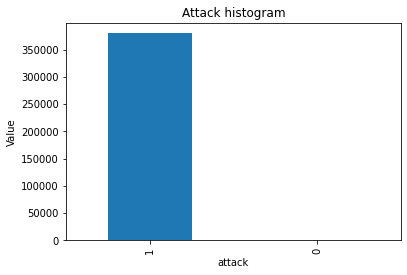

In [167]:
pd.value_counts(df['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['attack'].value_counts()

In [0]:
X = df.iloc[:, df.columns != 'attack']
y = df.iloc[:, df.columns == 'attack']

**Logistic Regression**

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix:
 [[   180      4]
 [     4 152003]]


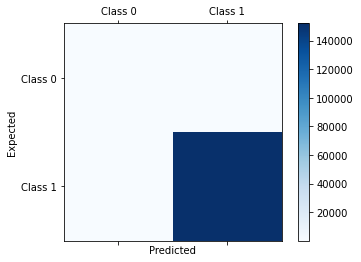

In [170]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [171]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9999474344737862


In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       1.00      1.00      1.00    152007

    accuracy                           1.00    152191
   macro avg       0.99      0.99      0.99    152191
weighted avg       1.00      1.00      1.00    152191



In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [174]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9891172774937996

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

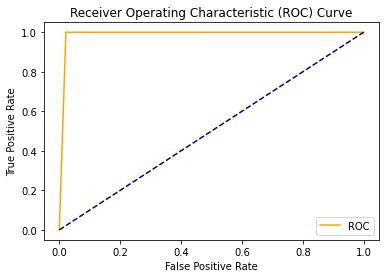

In [176]:
plot_roc_curve(fpr, tpr)

**KNN**

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Confusion matrix:
 [[   183      1]
 [     0 152007]]


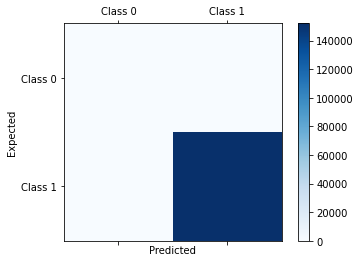

In [178]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [179]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9999934293092233


In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       184
           1       1.00      1.00      1.00    152007

    accuracy                           1.00    152191
   macro avg       1.00      1.00      1.00    152191
weighted avg       1.00      1.00      1.00    152191



In [181]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9972826086956521

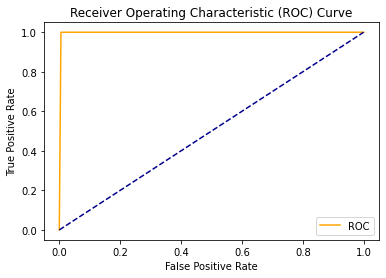

In [182]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)